In [130]:
import os
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot

In [79]:
test = []
files = os.listdir("/Users/dariasamsonova/Machine Learning/aclImdb/test/neg") 
for file in files:
    with open("/Users/dariasamsonova/Machine Learning/aclImdb/test/neg/" + file, encoding = 'utf8') as f:   
        #print(f.readlines())
        test.append({"text" : f.read(), 'y' : 0})

In [80]:
files = os.listdir("/Users/dariasamsonova/Machine Learning/aclImdb/test/pos") 
for file in files:
    with open("/Users/dariasamsonova/Machine Learning/aclImdb/test/pos/" + file, encoding = 'utf8') as f:   
        #print(f.readlines())
        test.append({"text" : f.read(), 'y' : 1})

In [81]:
len(test)

25000

In [82]:
train = []

files = os.listdir("/Users/dariasamsonova/Machine Learning/aclImdb/train/pos") 
for file in files:
    with open("/Users/dariasamsonova/Machine Learning/aclImdb/train/pos/" + file, encoding = 'utf8') as f:   
        #print(f.readlines())
        train.append({"text" : f.read(), 'y' : 1})

In [83]:
files = os.listdir("/Users/dariasamsonova/Machine Learning/aclImdb/train/neg") 
for file in files:
    with open("/Users/dariasamsonova/Machine Learning/aclImdb/train/neg/" + file, encoding = 'utf8') as f:   
        #print(f.readlines())
        train.append({"text" : f.read(), 'y' : 0})

In [84]:
len(train)

25000

In [85]:
train_data = pd.DataFrame.from_records(train)

In [86]:
test_data =  pd.DataFrame.from_records(test)

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data.text) #Learn the vocabulary dictionary and return term-document matrix.
X_train_counts.shape

(25000, 74849)

In [132]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train_counts, train_data.y)

In [133]:
from sklearn.metrics import *
X_test = count_vect.transform(test_data.text) # Extract token counts out of raw text documents using the vocabulary fitted with fit 
print(X_test.shape)
predicted = clf.predict(X_test)
predicted_proba = clf.predict_proba(X_test)
predicted_proba[:5]

(25000, 74849)


array([[0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6]])

accuracy=0.6244
F1=0.6488, Precision=0.6092, Recall=0.6939, ROC-AUC = 0.6244


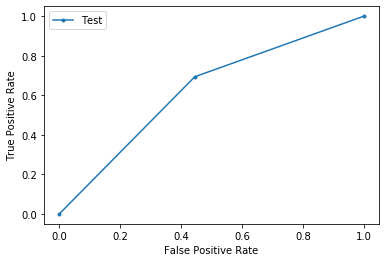

In [134]:
acc = accuracy_score(test_data.y, predicted)
f1 = f1_score(test_data.y, predicted)
precision = precision_score(test_data.y, predicted)
recall = recall_score(test_data.y, predicted)
roc_auc = roc_auc_score(test_data.y, predicted)
print('accuracy={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ROC-AUC = {3:1.4f}'.format(f1, precision, recall, roc_auc))
fpr, tpr, _ = roc_curve(test_data.y, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [135]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts,  train_data.y)
predicted = clf.predict(X_test)

accuracy=0.8136
F1=0.8006, Precision=0.8605, Recall=0.7484, ROC-AUC = 0.8136


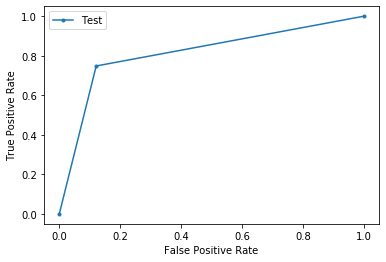

In [136]:
acc = accuracy_score(test_data.y, predicted)
f1 = f1_score(test_data.y, predicted)
precision = precision_score(test_data.y, predicted)
recall = recall_score(test_data.y, predicted)
roc_auc = roc_auc_score(test_data.y, predicted)
print('accuracy={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ROC-AUC = {3:1.4f}'.format(f1, precision, recall, roc_auc))
fpr, tpr, _ = roc_curve(test_data.y, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [137]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_counts,  train_data.y)
predicted = clf.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy=0.8667
F1=0.8657, Precision=0.8726, Recall=0.8588, ROC-AUC = 0.8667


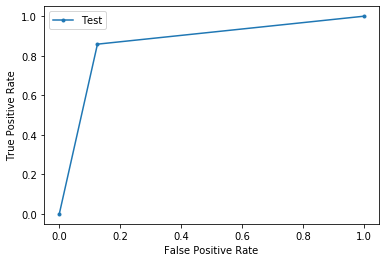

In [138]:
acc = accuracy_score(test_data.y, predicted)
f1 = f1_score(test_data.y, predicted)
precision = precision_score(test_data.y, predicted)
recall = recall_score(test_data.y, predicted)
roc_auc = roc_auc_score(test_data.y, predicted)
print('accuracy={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ROC-AUC = {3:1.4f}'.format(f1, precision, recall, roc_auc))
fpr, tpr, _ = roc_curve(test_data.y, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [139]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_counts,  train_data.y)
predicted = clf.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy=0.8458
F1=0.8441, Precision=0.8533, Recall=0.8351, ROC-AUC = 0.8458


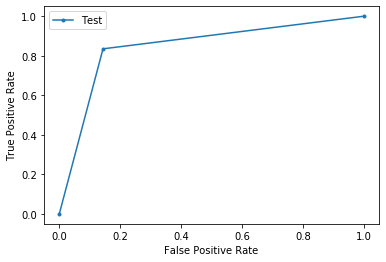

In [140]:
acc = accuracy_score(test_data.y, predicted)
f1 = f1_score(test_data.y, predicted)
precision = precision_score(test_data.y, predicted)
recall = recall_score(test_data.y, predicted)
roc_auc = roc_auc_score(test_data.y, predicted)
print('accuracy={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ROC-AUC = {3:1.4f}'.format(f1, precision, recall, roc_auc))
fpr, tpr, _ = roc_curve(test_data.y, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [141]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_counts,  train_data.y)
predicted = clf.predict(X_test)

accuracy=0.7158
F1=0.7166, Precision=0.7145, Recall=0.7187, ROC-AUC = 0.7158


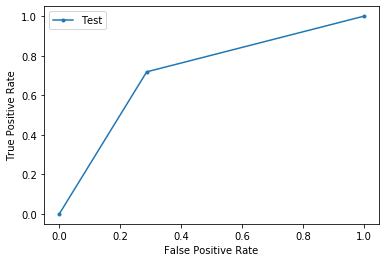

In [142]:
acc = accuracy_score(test_data.y, predicted)
f1 = f1_score(test_data.y, predicted)
precision = precision_score(test_data.y, predicted)
recall = recall_score(test_data.y, predicted)
roc_auc = roc_auc_score(test_data.y, predicted)
print('accuracy={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ROC-AUC = {3:1.4f}'.format(f1, precision, recall, roc_auc))
fpr, tpr, _ = roc_curve(test_data.y, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
accuracy=0.7384
F1=0.7346, Precision=0.7453, Recall=0.7242, ROC-AUC = 0.7384


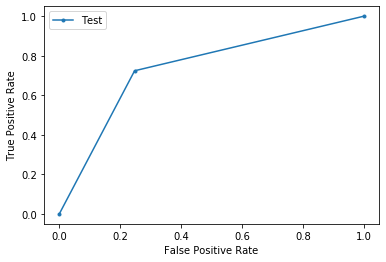

____________________________


TypeError: fit() missing 1 required positional argument: 'y'

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import roc_auc_score, roc_curve
classifiers = [KNeighborsClassifier(), LogisticRegression, MultinomialNB(), LinearSVC, DecisionTreeClassifier]
for classifier in classifiers:
    text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (2,3))), 
                         ('tfidf', TfidfTransformer()), 
                         ('clf', classifier)])
    text_clf.fit(train_data.text, train_data.y)  
    predicted = text_clf.predict(test_data.text)
    print(str(classifier))
    acc = accuracy_score(test_data.y, predicted)
    f1 = f1_score(test_data.y, predicted)
    precision = precision_score(test_data.y, predicted)
    recall = recall_score(test_data.y, predicted)
    roc_auc = roc_auc_score(test_data.y, predicted)
    print('accuracy={0:1.4f}'.format(acc))
    print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}, ROC-AUC = {3:1.4f}'.format(f1, precision, recall, roc_auc))
    fpr, tpr, _ = roc_curve(test_data.y, predicted)
    pyplot.plot(fpr, tpr, marker='.', label='Test')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    print("____________________________")